### Hotel Dataset for Personal Development

This data was shared to the BA&S team by Becca to download for personal development.

### Variable Descriptions  

##### Data Dictionary

* hotel: 	Hotel (H1 = Resort Hotel or H2 = City Hotel)

* is_canceled: 		Value indicating if the booking was canceled (1) or not (0)

* lead_time: 		Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* arrival_date_year:	     Year of arrival date
* arrival_date_month:		Month of arrival date
* arrival_date_week_number:	  	Week number of year for arrival date
* arrival_date_day_of_month:	 	Day of arrival date
* stays_in_weekend_nights:		Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* stays_in_week_nights:		Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* adults:		Number of adults
* children:		Number of children
* babies:		Number of babies
* meal:	Type of meal booked.
        Categories are presented in standard hospitality meal packages:
		Undefined/SC – no meal package;
		BB – Bed & Breakfast;
		HB – Half board (breakfast and one other meal – usually dinner);
		FB – Full board (breakfast, lunch and dinner)
* country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
* market_segment:		Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* distribution_channel:	   Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* is_repeated_guest:      	Value indicating if the booking name was from a repeated guest (1) or not (0)
* previous_cancellations:	 	Number of previous bookings that were cancelled by the customer prior to the current booking
* previous_bookings_not_canceled:	    	Number of previous bookings not cancelled by the customer prior to the current booking
* reserved_room_type:	  	Code of room type reserved. Code is presented instead of designation for anonymity reasons
* assigned_room_type:		Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
* booking_changes:		Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* deposit_type:  	Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
		No Deposit – no deposit was made;
		Non Refund – a deposit was made in the value of the total stay cost;
		Refundable – a deposit was made with a value under the total cost of stay.
* agent:   	ID of the travel agency that made the booking
* company:	    	ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* days_in_waiting_list:	  	Number of days the booking was in the waiting list before it was confirmed to the customer
* customer_type:
        Type of booking, assuming one of four categories:
		Contract - when the booking has an allotment or other type of contract associated to it;
		Group – when the booking is associated to a group;
		Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
		Transient-party – when the booking is transient, but is associated to at least other transient booking
* adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
* required_car_parking_spaces:	 	Number of car parking spaces required by the customer
* total_of_special_requests	:    	Number of special requests made by the customer (e.g. twin bed or high floor)
* reservation_status:	     
        Reservation last status, assuming one of three categories:
		Canceled – booking was canceled by the customer;
		Check-Out – customer has checked in but already departed;
		No-Show – customer did not check-in and did inform the hotel of the reason why
* reservation_status_date
   Date at which the last status was set. This variable can be used in conjunction with the * ReservationStatus to understand   when was the booking canceled or when did the customer checked-out of the hotel


## Python Packages
Below are some of the python packages used throughout this project.

In [69]:
import plotly.graph_objs as go
import plotly as plt
import seaborn as sns
import numpy as np
import glob
import plotly.express as px
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib
import statistics
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
#pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org dython

In [70]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org xgboost

In [71]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
#read in the csv file
H_df= pd.read_csv('gdrive/MyDrive/hotels.csv')

In [73]:
H_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [74]:

H_df.shape

(119390, 32)

In [75]:
H_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Fill nan values

In [76]:
H_df['agent'].fillna('0', inplace=True)

In [77]:
H_df['company'].fillna('Nil', inplace=True)

In [78]:
H_df['children'].fillna(0, inplace=True)

In [79]:
H_df.dropna(subset=['country'], inplace=True)

In [80]:
H_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118902 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  children                        118902 non-null  float64
 11  babies                          118902 non-null  int64  
 12  meal                 

In [81]:
H_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Nil,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Nil,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Nil,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,Nil,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,Nil,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,Nil,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,Nil,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,Nil,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,Nil,0,Transient,104.40,0,0,Check-Out,07/09/2017


### Converting datatypes to approriate datatype

In [82]:
# changing datatype of column 'reservation_status_date' to data_type.
H_df['Reservation_StDate'] = pd.to_datetime(H_df['reservation_status_date'], format='%d/%m/%Y')

### New Columns

Created new columns for ease of undersanding and data quality

In [83]:
# Adding total staying days in hotels
H_df['Stay_Types'] = H_df['stays_in_weekend_nights']+H_df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
H_df['People_Total'] = H_df['adults']+H_df['children']+H_df['babies']

### EXPLORATORY DATA ANALYSIS

Def function for ease of Data Analysis

In [84]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):

  fig, ax = plt.subplots(figsize=figsize)

  if x_label != None:
      ax.set_xlabel(x_label)

  if y_label != None:
      ax.set_ylabel(y_label)

  if title != None:
      ax.set_title(title)

  if type == 'bar':
      sns.barplot(x,y, ax = ax)
  elif type == 'line':
      sns.lineplot(x,y, ax = ax)

  plt.show()

In [85]:
def get_count(series, limit=None):

    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()

    x = series.index
    y = series/series.sum()*100

    return x.values,y.values

In [86]:
Numerical_var = H_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','Stay_Types','People_Total']]


## Agents according to the number of booking

We can see from the histogram graph below that agent 9 has the highest number of bookings.

In [87]:
#d1 = pd.DataFrame(H_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
#d1.drop(d1[d1['agent'] == 0].index, inplace = True)
#1 = d1[:10]
#plt.figure(figsize = (10,5))
#sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

### The most selected meal arrangement

It can be observed from this graph that breakfast is the most selected meal type, it could be because breakfasts comes with bookings or it is cheaper.

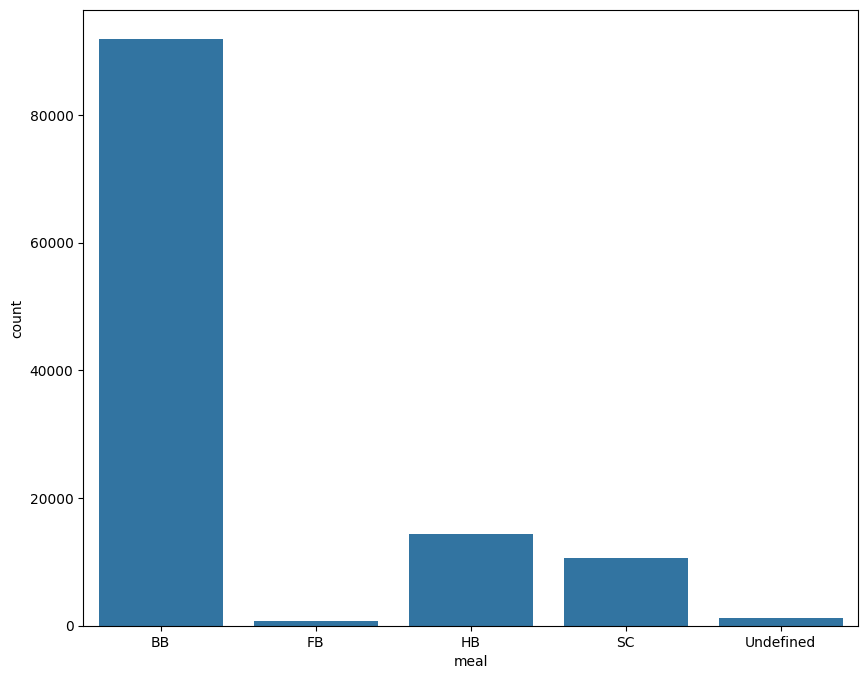

In [88]:
plt.figure( figsize=(10, 8))

# visualising the meal types
sns.countplot(x = H_df['meal'])
plt.show()

## Canceled Bookings

In [89]:
canc_d = get_count(H_df['is_canceled'])


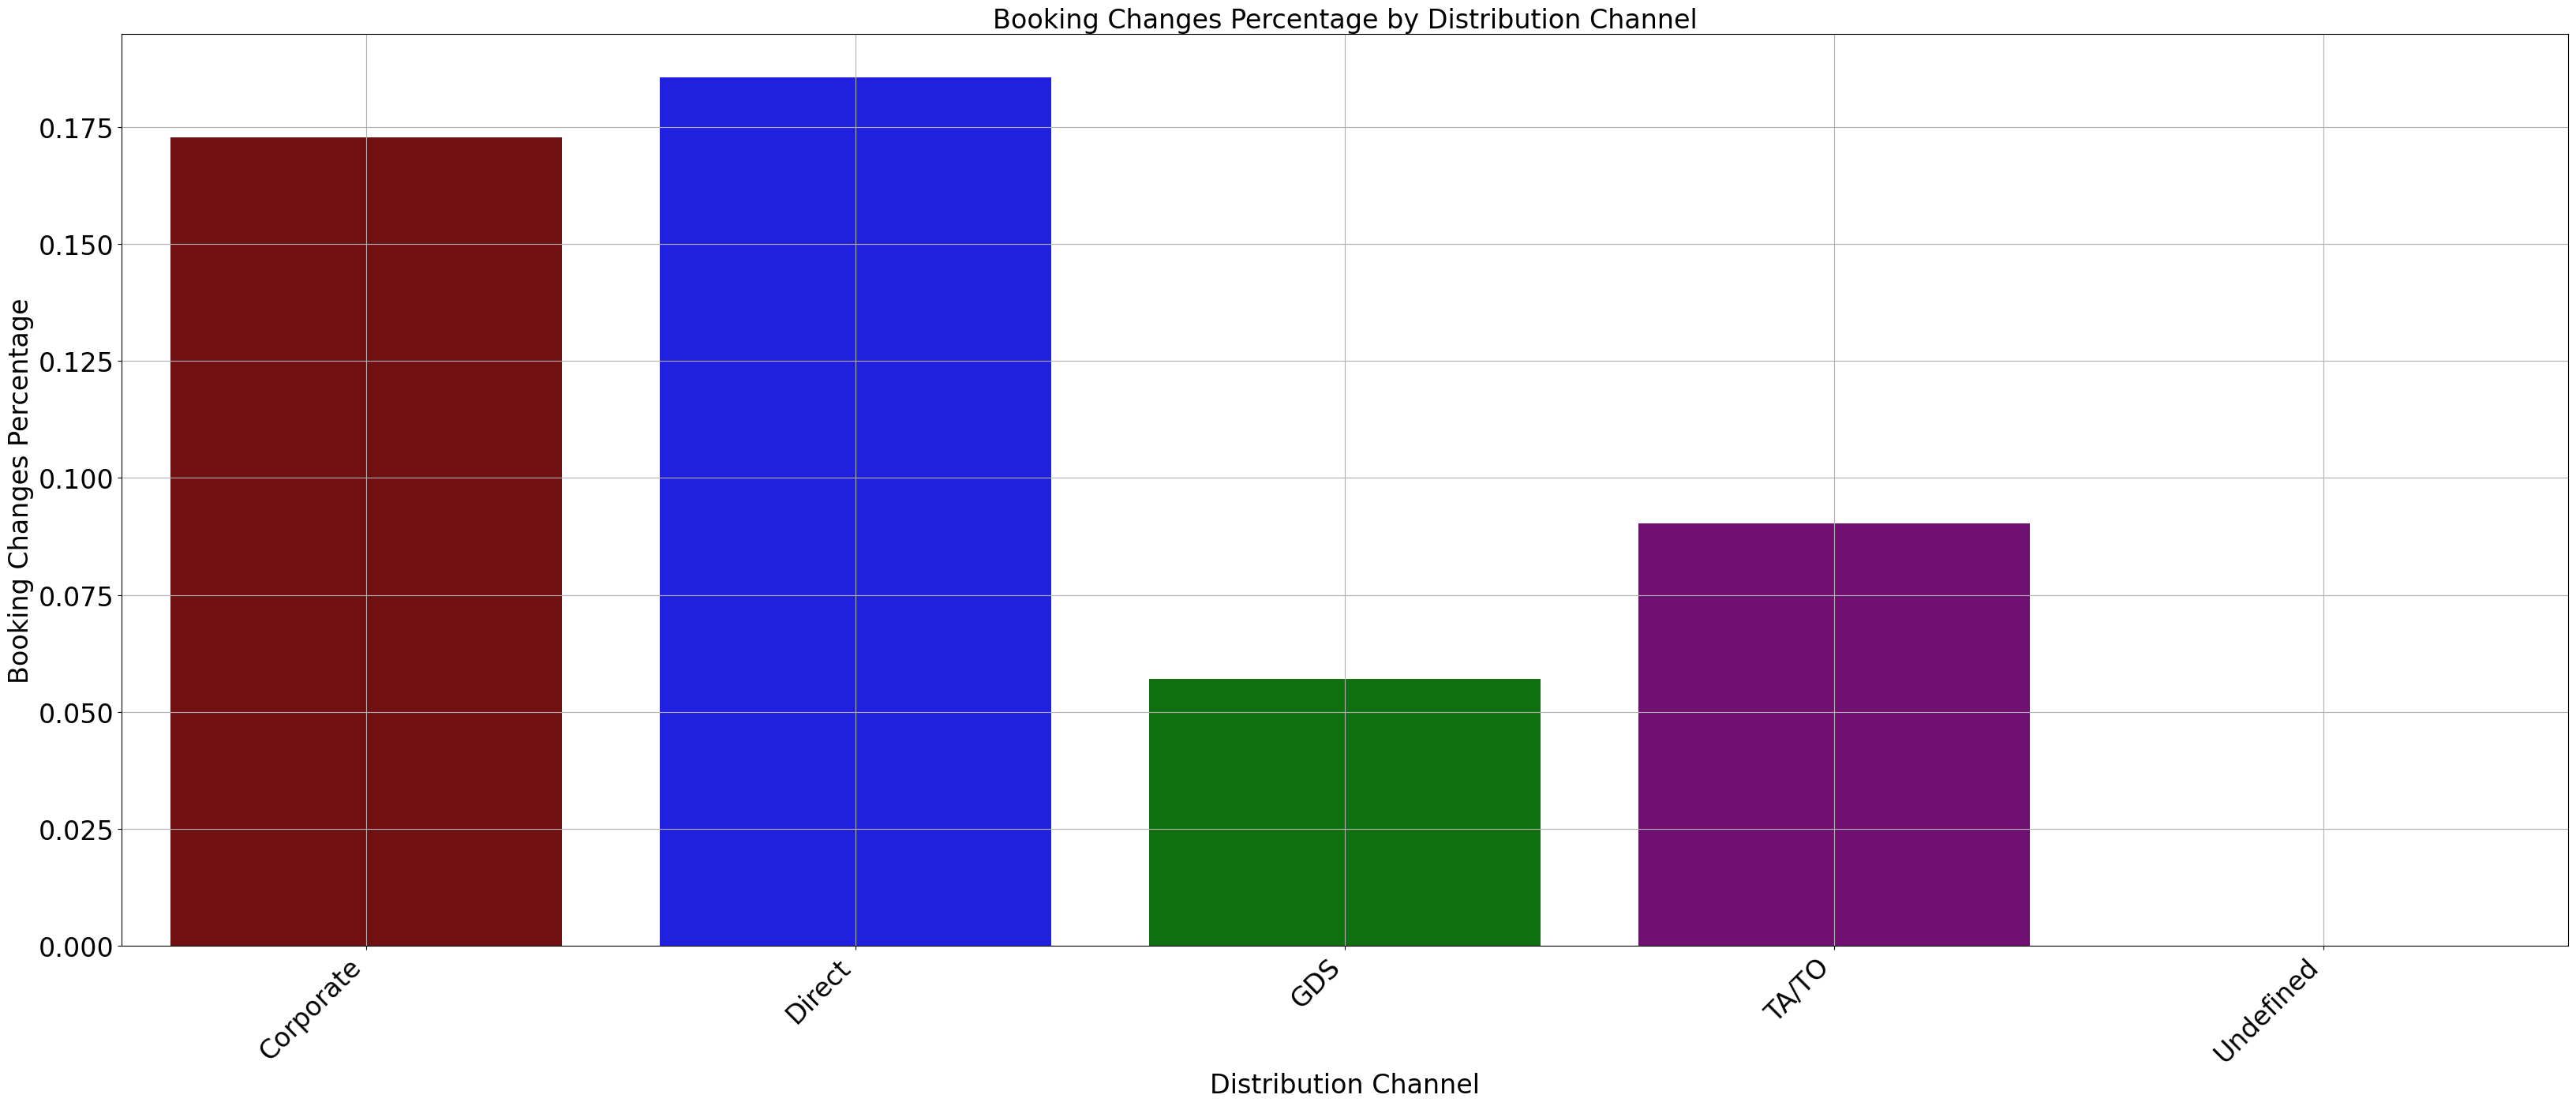

In [90]:
# Compute the crosstab with normalization by index
booking_dist= pd.crosstab(H_df['distribution_channel'], H_df['booking_changes'], normalize='index')


plt.figure(figsize=(40, 15))
sns.barplot(x=booking_dist.index, y=booking_dist[1], palette=['maroon', 'blue', 'green', 'purple', 'orange'])
plt.xlabel('Distribution Channel', fontsize=24)  # Increased font size
plt.ylabel('Booking Changes Percentage', fontsize=24)  # Increased font size
plt.title('Booking Changes Percentage by Distribution Channel', fontsize=24)  # Increased font size
plt.xticks(rotation=45, ha='right', fontsize=24)  # Increased font size
plt.yticks(fontsize=24)  # Increased font size
plt.grid(True)

# Show the plot
plt.show()

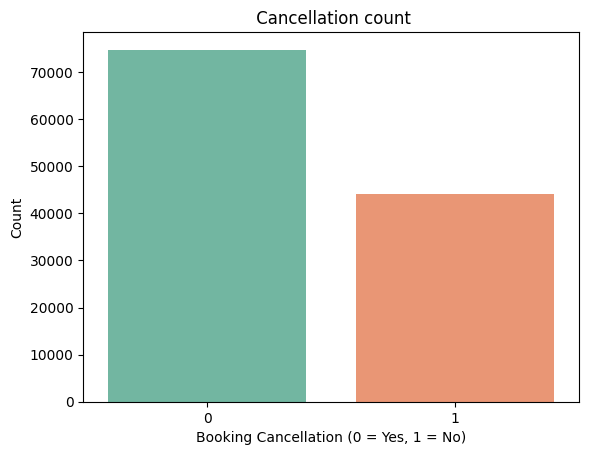

In [91]:
# Create a count plot for the 'survived' column (0 = Yes, 1 = No)
sns.countplot(x="is_canceled", data=H_df, palette="Set2")

# Customize the plot
plt.xlabel("Booking Cancellation (0 = Yes, 1 = No)")
plt.ylabel("Count")
plt.title(" Cancellation count")

# Show the plot
plt.show()

### Booking Percentage Per Hotel Type

In [92]:
Not_canceled= H_df[H_df['is_canceled'] == 0]

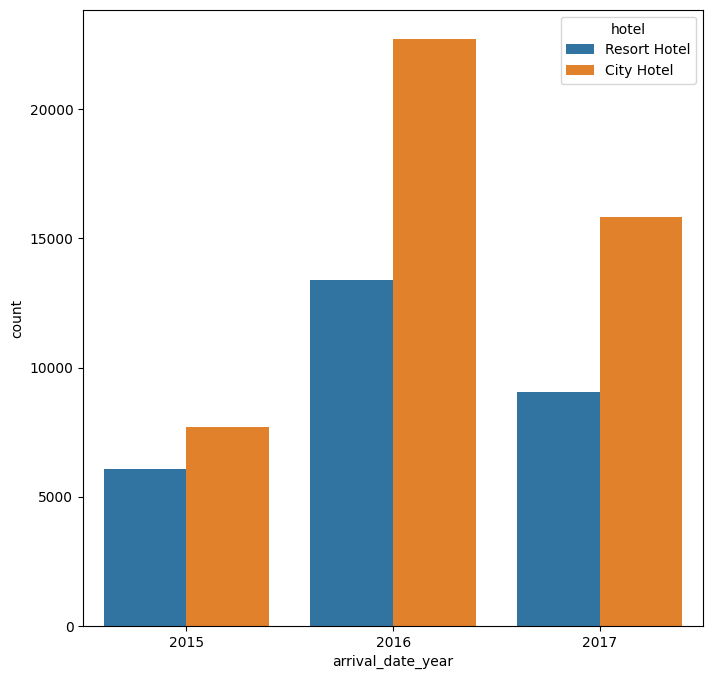

In [93]:
plt.subplots(figsize=(8,8))
sns.countplot(x='arrival_date_year', hue='hotel',  data=Not_canceled);

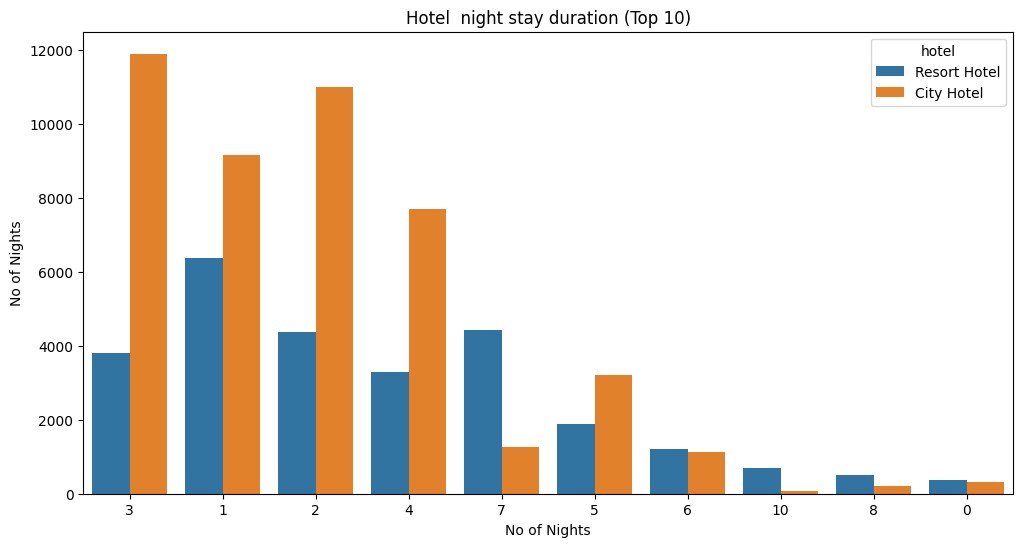

In [94]:
Not_canceled.loc[:,'total_nights'] = Not_canceled['stays_in_weekend_nights']+ Not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel  night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=Not_canceled, order = Not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

### Most Distribution Channel

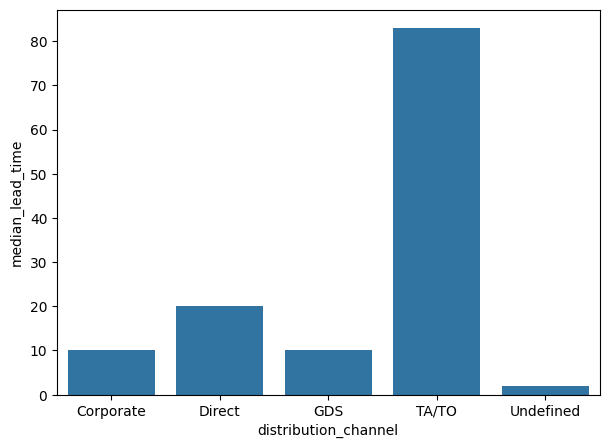

In [95]:
group_by_dc = H_df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

### Pie Chart to show the distribution channel per bookings.

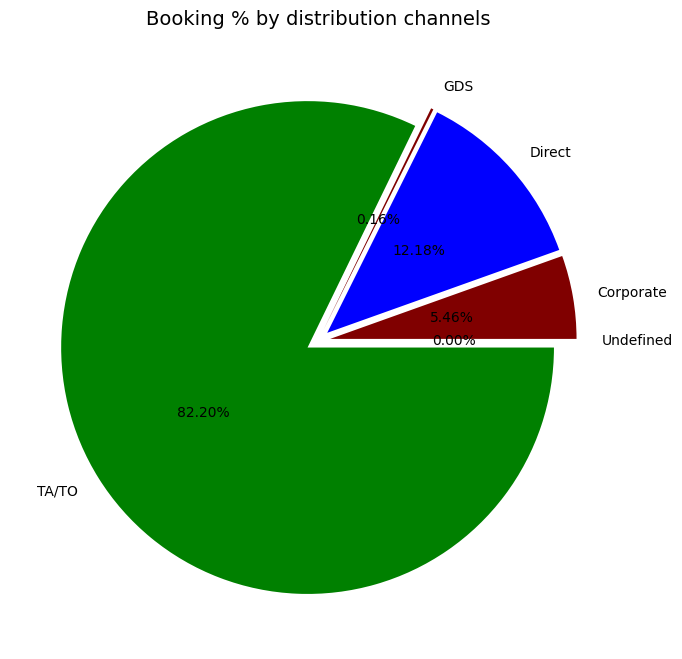

In [96]:

d1 = pd.DataFrame(round((group_by_dc.size() / H_df.shape[0]) * 100, 2)).reset_index().rename(columns={0: 'Booking_%'})

plt.figure(figsize=(8, 8))
data = d1['Booking_%']
labels = d1['distribution_channel']
colors = ['maroon', 'blue', 'maroon', 'green', 'maroon']  # Adjust the colors as needed
plt.pie(x=data, autopct="%.2f%%", explode=[0.05] * 5, labels=labels, pctdistance=0.5, colors=colors)
plt.title("Booking % by distribution channels", fontsize=14)

# Show the plot
plt.show()


## Channel used for early booking

<Figure size 1200x600 with 0 Axes>

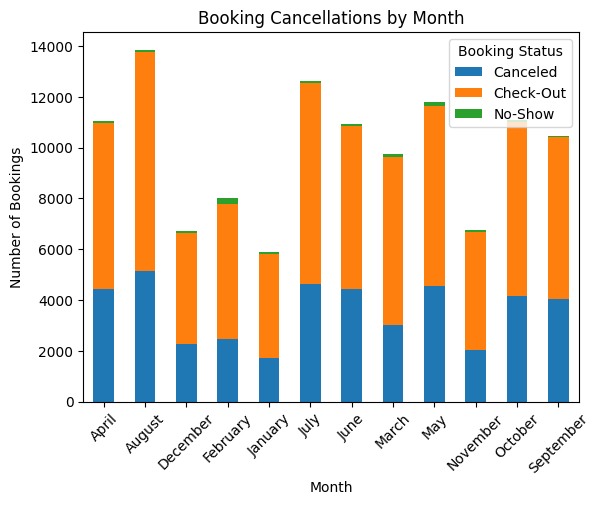

In [97]:


# Grouping data by month and booking status
monthly_cancellations = H_df.groupby(['arrival_date_month', 'reservation_status']).size().unstack()

# Plotting the cancellations by month
plt.figure(figsize=(12, 6))
monthly_cancellations.plot(kind='bar', stacked=True)
plt.title('Booking Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Booking Status')
plt.show()

### Time Series

The line graph below displays how many bookings were recieved per hotel type on monthly basis. It can be observed that there was an increase in bookings in the month of August for City Hotel. For Resort hotel, there was an increase in bookings between the month of June to September. The bookings started to reduce from the month of September which may be due to change in weather season from summer to autumn

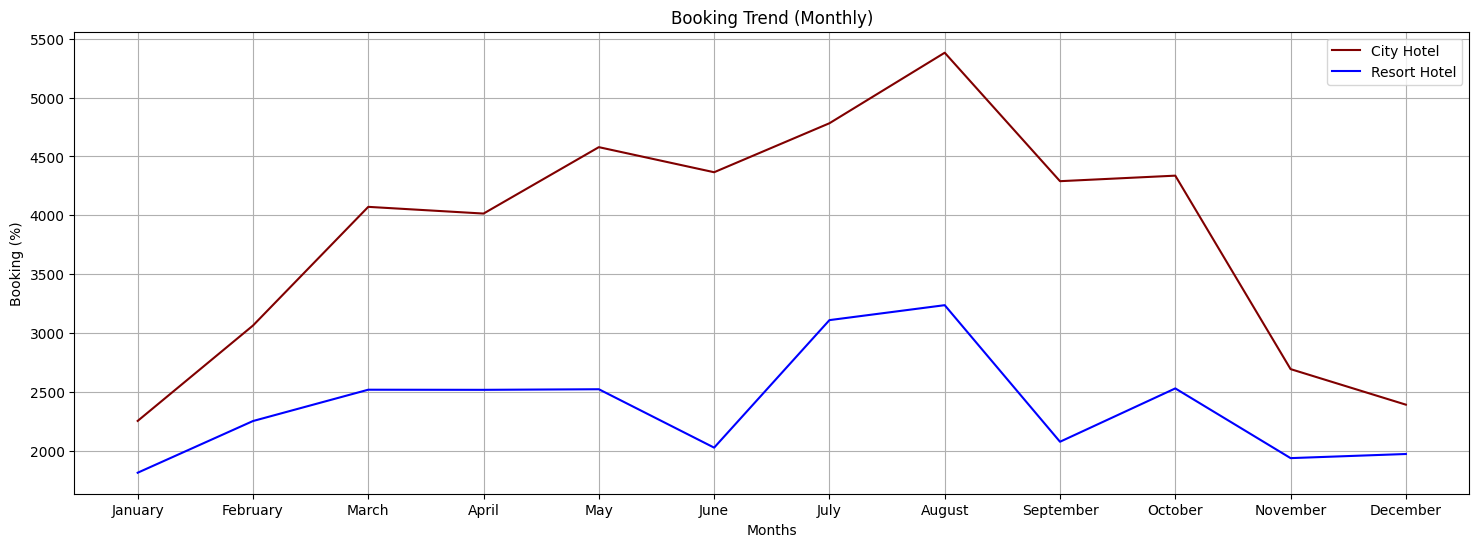

In [98]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
             'November', 'December']

sorted_months_city = Not_canceled.loc[Not_canceled['hotel'] == 'City Hotel', 'arrival_date_month'].value_counts().reindex(new_order)

sorted_months_resort = Not_canceled.loc[Not_canceled['hotel'] == 'Resort Hotel', 'arrival_date_month'].value_counts().reindex(new_order)

plt.figure(figsize=(18, 6))
ax = sns.lineplot(x=sorted_months_city.index, y=sorted_months_city.values, label='City Hotel', color='maroon')
sns.lineplot(x=sorted_months_resort.index, y=sorted_months_resort.values, label='Resort Hotel', color='blue')


plt.xlabel('Months')
plt.ylabel('Booking (%)')
plt.title('Booking Trend (Monthly)')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### High revenue Generating month

As seen in the line chart above, there was an increase in bookings between the month of June and August at Resort Hotel which is a reflection of what we are seeing below, Resort Hotel appears to have generated more revenue between the month of June and August.

In [99]:
data_resort = H_df[(H_df['hotel'] == 'Resort Hotel') & (H_df['is_canceled'] == 0)]
data_city = H_df[(H_df['hotel'] == 'City Hotel') & (H_df['is_canceled'] == 0)]

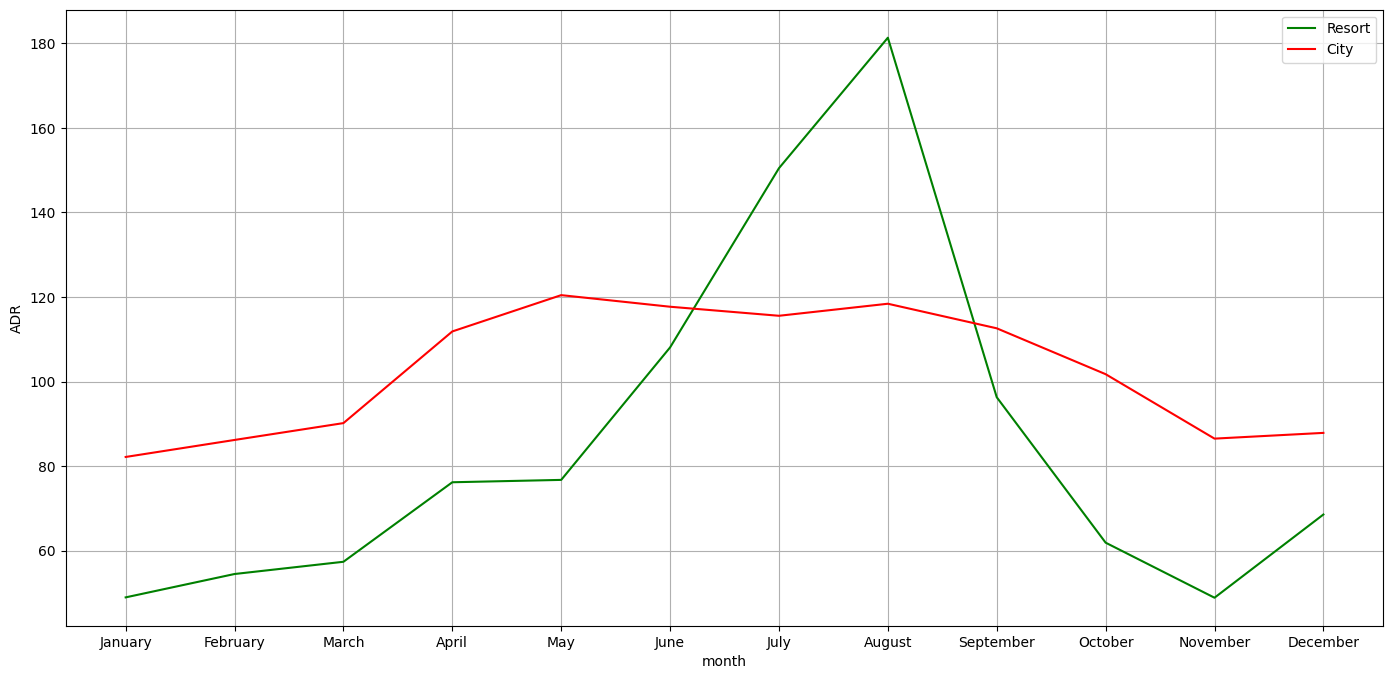

In [100]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

final_hotel = resort_hotel.merge(city_hotel, on='arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()

plt.figure(figsize=(17, 8))
sns.lineplot(data=final_hotel, x='month', y='price_for_resort', label= 'Resort', color='green')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel', label= 'City', color='red')

plt.legend
plt.ylabel('ADR')
plt.grid(True)

# Show the plot
plt.show()


## Statistics/Numbers

In [101]:
H_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Reservation_StDate,Stay_Types,People_Total
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,...,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902,118902.000000,118902.000000
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,...,0.087139,0.131629,0.221174,2.330676,102.000808,0.061883,0.571706,2016-07-30 07:20:24.584952064,3.431027,1.970556
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00,2.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00,3.000000,2.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00,4.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,57.000000,55.000000
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,...,0.845855,1.484647,0.652775,17.630161,50.487004,0.244168,0.792678,NaN,2.544932,0.721888


In [102]:

hotel_counts = H_df['hotel'].value_counts().reset_index()
hotel_counts.columns = ['hotel', 'count']


print(hotel_counts)

          hotel  count
0    City Hotel  79306
1  Resort Hotel  39596


In [103]:

Booking_change = H_df['booking_changes'].value_counts().reset_index()
Booking_change.columns = ['booking_changes', 'count']


print(Booking_change)

    booking_changes   count
0                 0  100906
1                 1   12639
2                 2    3790
3                 3     925
4                 4     375
5                 5     118
6                 6      63
7                 7      31
8                 8      17
9                 9       8
10               10       6
11               13       5
12               14       5
13               15       3
14               16       2
15               17       2
16               12       2
17               11       2
18               20       1
19               21       1
20               18       1


### Cancellation by location

In [104]:
# Compute the crosstab with normalization by index
booking_dist= pd.crosstab(H_df['distribution_channel'], H_df['booking_changes'], normalize='index')
print(booking_dist)


booking_changes             0         1         2         3         4   \
distribution_channel                                                     
Corporate             0.747651  0.172855  0.055461  0.014944  0.006316   
Direct                0.730995  0.185528  0.055997  0.016778  0.006836   
GDS                   0.927461  0.056995  0.010363  0.005181  0.000000   
TA/TO                 0.872629  0.090238  0.026778  0.005976  0.002405   
Undefined             1.000000  0.000000  0.000000  0.000000  0.000000   

booking_changes             5         6         7         8         9   ...  \
distribution_channel                                                    ...   
Corporate             0.001695  0.000462  0.000462  0.000000  0.000000  ...   
Direct                0.002348  0.000690  0.000345  0.000276  0.000000  ...   
GDS                   0.000000  0.000000  0.000000  0.000000  0.000000  ...   
TA/TO                 0.000747  0.000512  0.000235  0.000133  0.000082  ...   
Undefin

In [105]:
# Compute the crosstab with normalization by index
Hot_Meal_Cancel = pd.crosstab([H_df['hotel'], H_df['meal']], H_df['is_canceled'], normalize='index')
print(Hot_Meal_Cancel)



is_canceled                    0         1
hotel        meal                         
City Hotel   BB         0.572107  0.427893
             FB         0.204545  0.795455
             HB         0.620228  0.379772
             SC         0.625332  0.374668
Resort Hotel BB         0.736189  0.263811
             FB         0.412467  0.587533
             HB         0.682674  0.317326
             SC         0.987805  0.012195
             Undefined  0.754506  0.245494


### Correlation Check

In [106]:
#print column headers
column_headers_list_comp = [col for col in H_df]
print("Column headers from list comprehension:", column_headers_list_comp)


Column headers from list comprehension: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'Reservation_StDate', 'Stay_Types', 'People_Total']


In [107]:
!pip install dython
import dython
from dython.nominal import associations

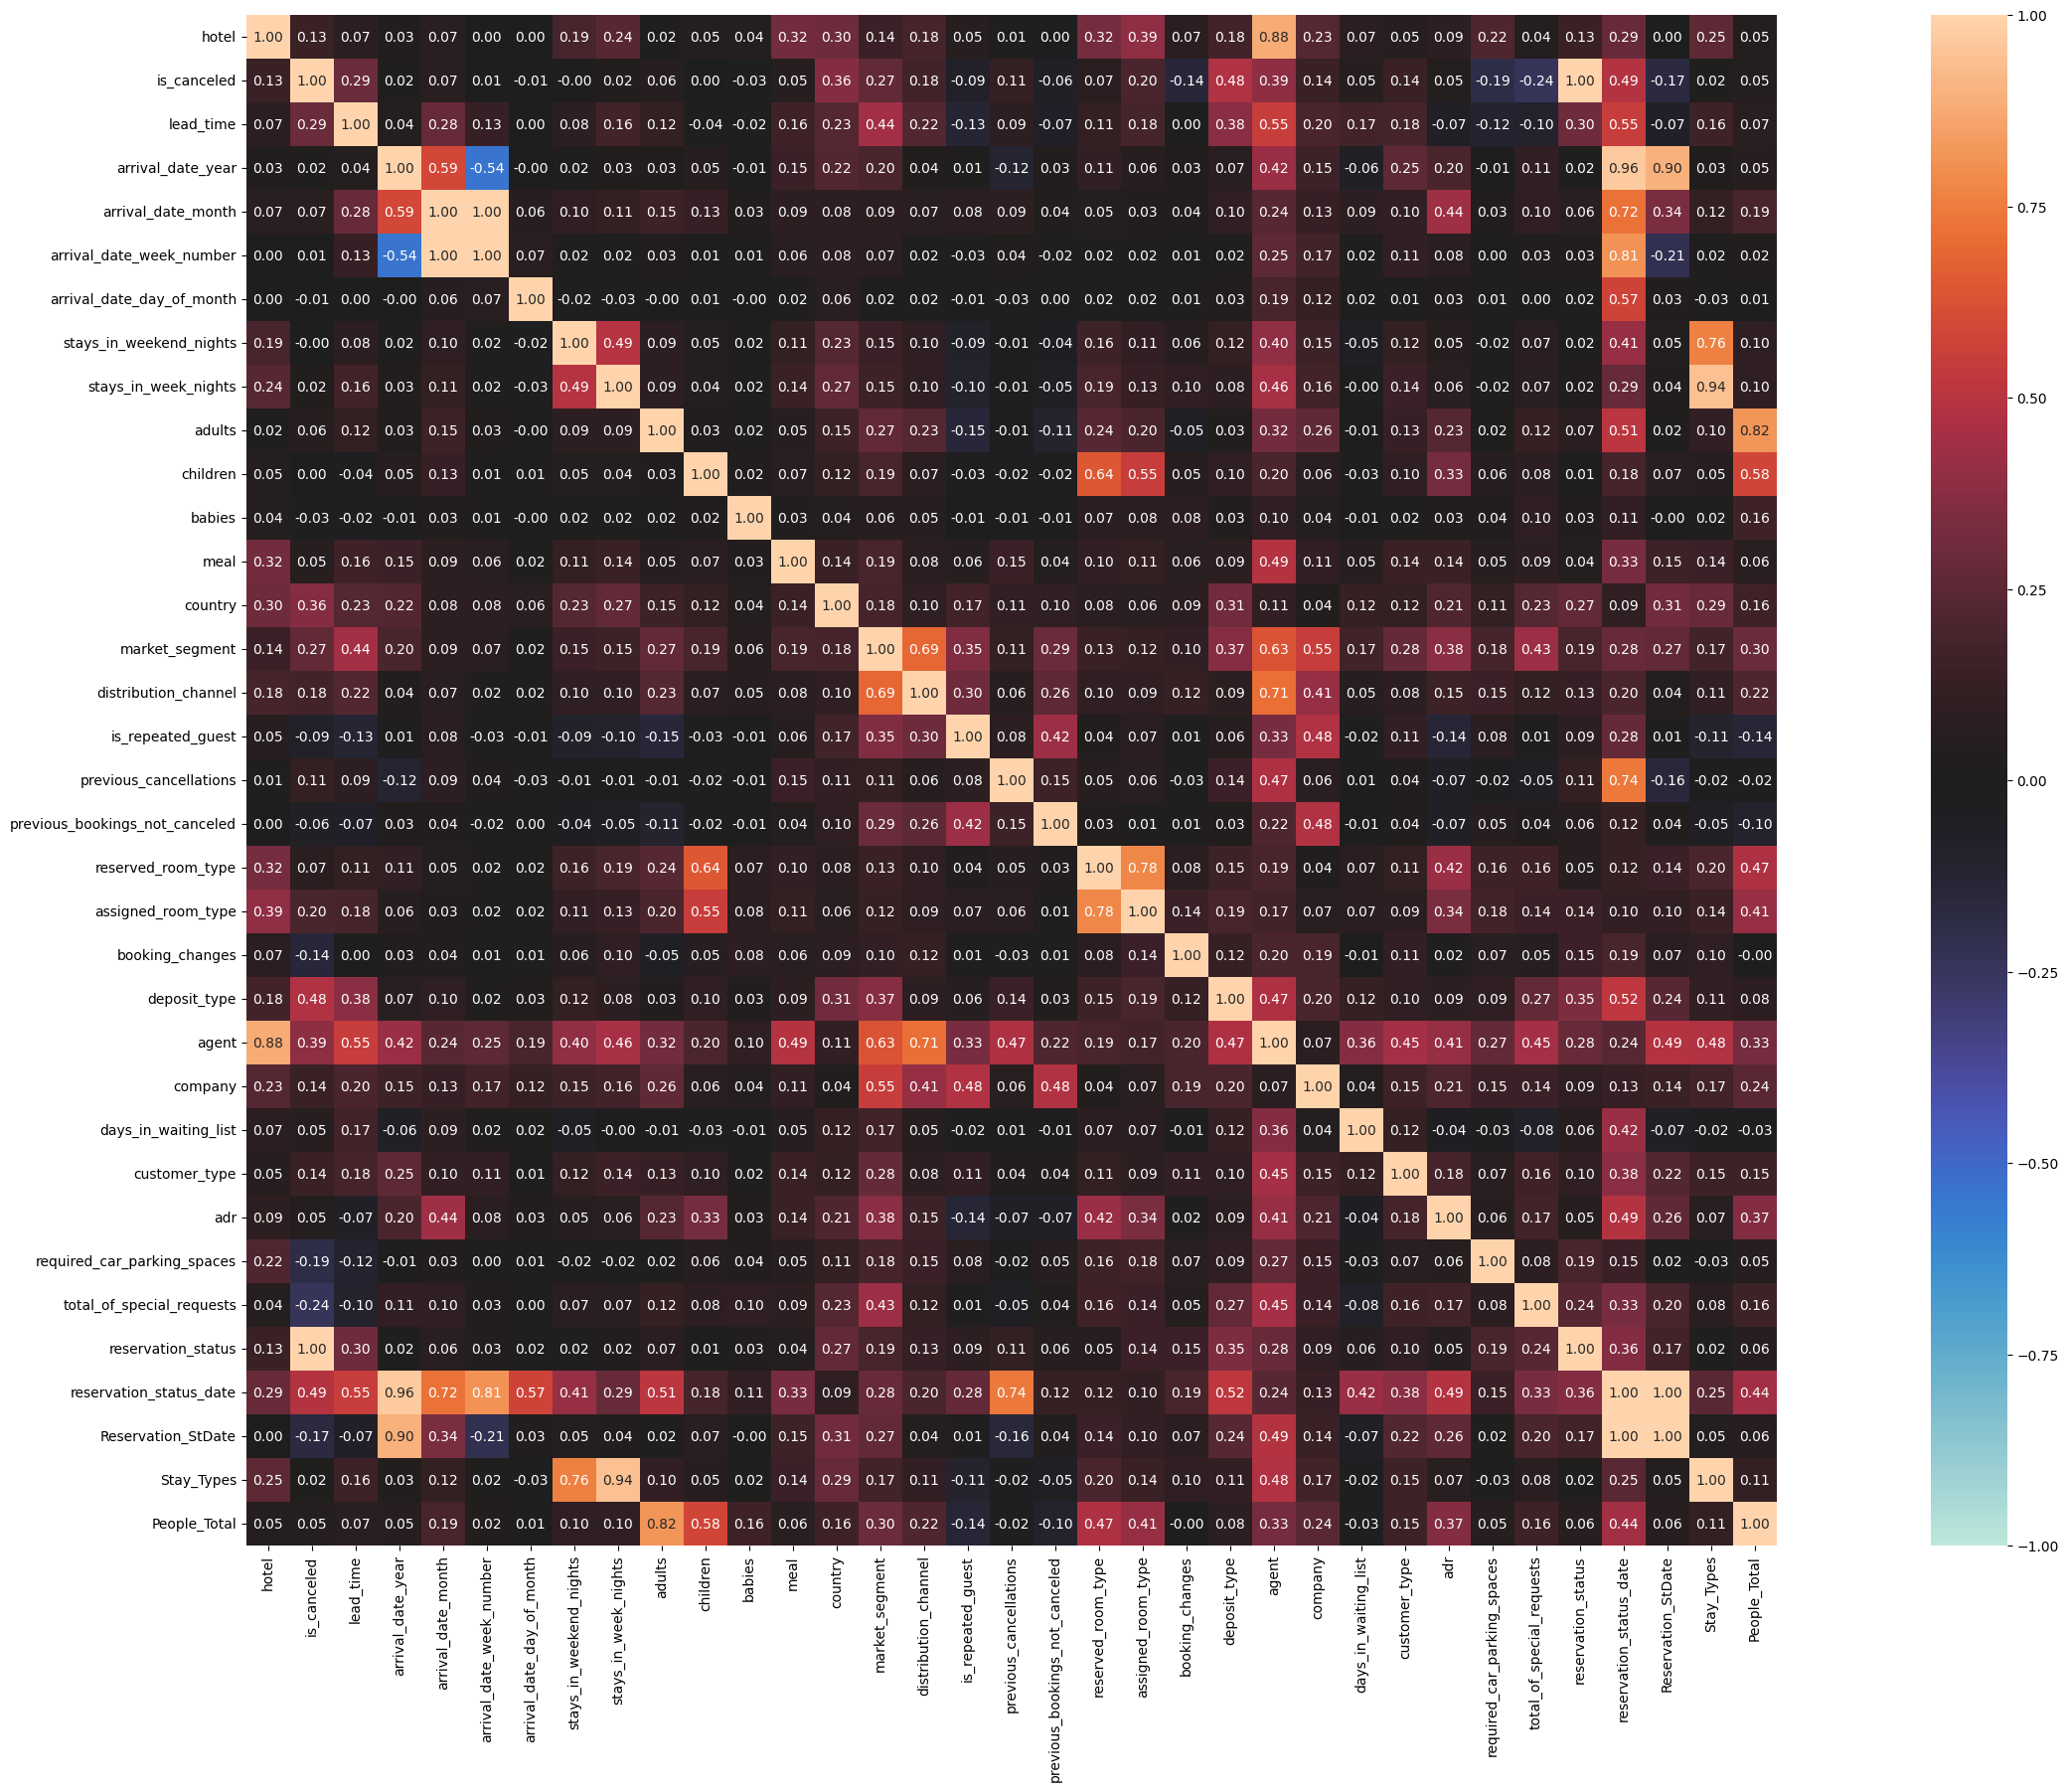

In [108]:
associations(H_df, figsize = (40, 20))
plt.show()

### Correlation for numerical values

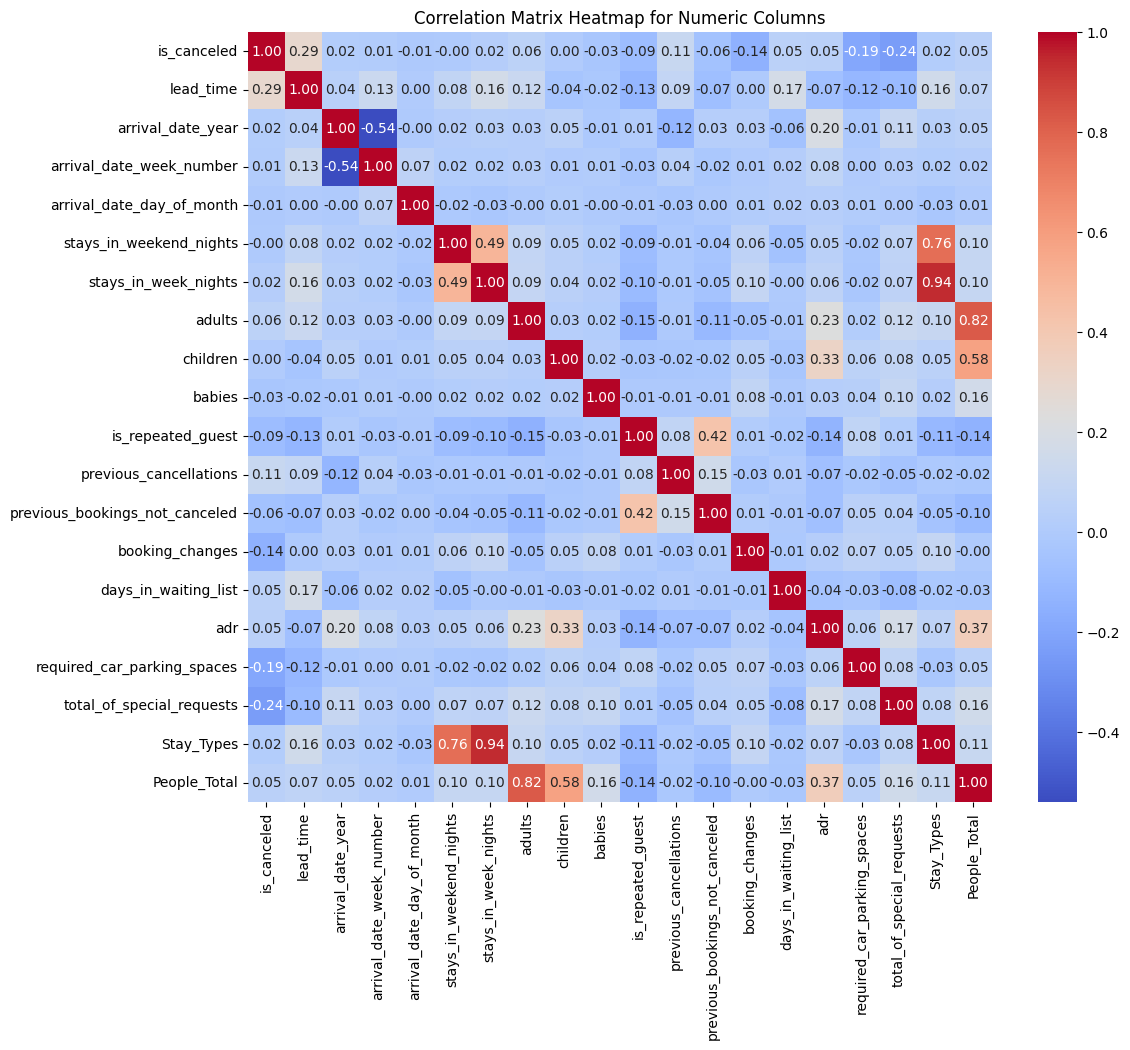

In [109]:
#import numpy as np

# Re-identifying numeric columns for correlation matrix
numeric_columns = H_df.select_dtypes(include=[np.number]).columns

# Recalculating the correlation matrix for numeric columns only
numeric_correlation_matrix = H_df[numeric_columns].corr()

# Re-plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Numeric Columns')
plt.show()

In [110]:
H_df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K', 'P'],
      dtype=object)

### Encoding Hotel Type

In [111]:

H_df['hotel_encoded'] = H_df['hotel'].map({'City Hotel': 1, 'Resort Hotel':0})
H_df['assigned_room_type'] = H_df['assigned_room_type'].map({'A': 1, 'C':3, 'D': 4, 'E': 5, 'G': 7, 'F' : 6, 'I':9, 'B':2, 'H':8, 'L' : 12, 'K': 11, 'P': 15})

### MODEL TRAINING

In [112]:
H_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118902 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118902 non-null  object        
 1   is_canceled                     118902 non-null  int64         
 2   lead_time                       118902 non-null  int64         
 3   arrival_date_year               118902 non-null  int64         
 4   arrival_date_month              118902 non-null  object        
 5   arrival_date_week_number        118902 non-null  int64         
 6   arrival_date_day_of_month       118902 non-null  int64         
 7   stays_in_weekend_nights         118902 non-null  int64         
 8   stays_in_week_nights            118902 non-null  int64         
 9   adults                          118902 non-null  int64         
 10  children                        118902 non-null  float64     

In [113]:
X = H_df[['hotel_encoded','lead_time', 'country', 'agent', 'days_in_waiting_list','market_segment', 'deposit_type', 'required_car_parking_spaces', 'total_of_special_requests','assigned_room_type', 'previous_cancellations','previous_bookings_not_canceled', 'customer_type', 'booking_changes', 'Stay_Types', 'babies', 'adults', 'children']]
y = H_df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)


In [114]:
X_train.head()

,hotel_encoded,lead_time,country,agent,days_in_waiting_list,market_segment,deposit_type,required_car_parking_spaces,total_of_special_requests,assigned_room_type,previous_cancellations,previous_bookings_not_canceled,customer_type,booking_changes,Stay_Types,babies,adults,children
82217,1,317,PRT,58.0,56,Offline TA/TO,Non Refund,0,0,1,1,0,Transient,0,3,0,2,0.0
8195,0,261,PRT,240.0,0,Online TA,No Deposit,0,2,1,0,0,Transient,1,3,0,2,0.0
115865,1,126,GBR,9.0,0,Online TA,No Deposit,0,0,1,0,0,Transient,0,6,0,2,0.0
20386,0,5,PRT,0,0,Corporate,No Deposit,1,0,4,0,0,Transient,0,1,0,1,0.0
89820,1,8,ISR,9.0,0,Online TA,No Deposit,0,1,1,0,0,Transient,0,1,0,1,0.0


In [115]:
cat_columns = ['market_segment','deposit_type','customer_type']
num_columns = ['hotel_encoded','lead_time', 'agent', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests','assigned_room_type', 'previous_cancellations','previous_bookings_not_canceled', 'booking_changes', 'Stay_Types', 'adults', 'children','babies']


In [116]:
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

prepocessor = ColumnTransformer([
    ('categorical',categorical_pipeline,cat_columns),
    ('numerical', numerical_pipeline,num_columns)
])

pipe_logreg = Pipeline([
    ("prep", prepocessor),
    ("algo", LogisticRegression())
])

pipe_KNN = Pipeline([
    ('prep', prepocessor),
    ('algo', KNeighborsClassifier())
])


pipe_RF = Pipeline([
    ("prep", prepocessor),
    ("algo", RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("prep", prepocessor),
    ("algo", DecisionTreeClassifier())
])

pipe_XGB = Pipeline([
    ("prep", prepocessor),
    ("algo", XGBClassifier())
])


### LOGISTIC REGRESSION

In [117]:
pipe_logreg.fit(X_train, y_train)
y_pred_logreg_base =  pipe_logreg.predict(X_test)
y_pred_logreg_base_train = pipe_logreg.predict(X_train)

In [118]:
recall_logreg_base = recall_score(y_test, y_pred_logreg_base)
acc_logreg_base = accuracy_score(y_test, y_pred_logreg_base)
precision_logreg_base = precision_score(y_test, y_pred_logreg_base)
f1_logreg_base = f1_score(y_test, y_pred_logreg_base)
acc_logreg_base_train = accuracy_score(y_train, y_pred_logreg_base_train)

print(f"Training Accuracy : {acc_logreg_base_train}")
print(f"Testing Accuracy : {acc_logreg_base}")

# we see here that the model is not over fit or underfitting using logistic regression model

Training Accuracy : 0.8053216429600193
Testing Accuracy : 0.8054329086245322


In [119]:
print(classification_report(y_test, y_pred_logreg_base))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86     14949
           1       0.84      0.59      0.69      8832

    accuracy                           0.81     23781
   macro avg       0.82      0.76      0.78     23781
weighted avg       0.81      0.81      0.80     23781



In [120]:
cm_logreg_base = confusion_matrix(y_test, y_pred_logreg_base, labels = [1,0])
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
df_logreg_base

,Prediction 1,Prediction 0
actual 1,5215,3617
actual 0,1010,13939


<Axes: >

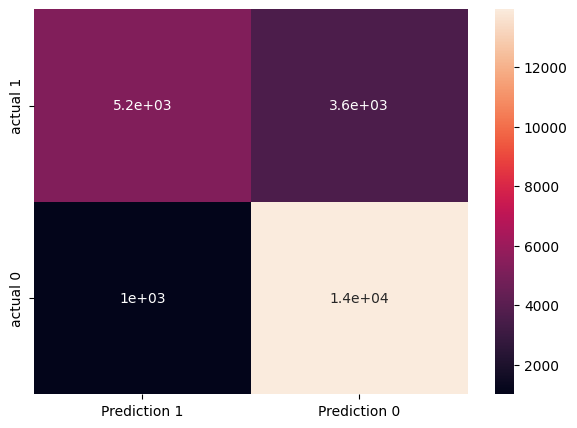

In [121]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_logreg_base, annot = True)

# we see that using logistic regression we have around 1200 ++ false positive in this case (not cancelled booking) thats predicted
# to be cancelled
# and we have around 3300 ++ False Negative means (cancelled booking that's considered not cancelled)

### Random Forest

In [122]:
pipe_RF.fit(X_train, y_train)
y_pred_RF_base =  pipe_RF.predict(X_test)
y_pred_RF_base_train = pipe_RF.predict(X_train)

In [123]:
recall_RF_base = recall_score(y_test, y_pred_RF_base)
acc_RF_base = accuracy_score(y_test, y_pred_RF_base)
precision_RF_base = precision_score(y_test, y_pred_RF_base)
f1_RF_base = f1_score(y_test, y_pred_RF_base)
acc_RF_base_train = accuracy_score(y_train, y_pred_RF_base_train)

print(f"Training Accuracy : {acc_RF_base_train}")
print(f"Testing Accuracy : {acc_RF_base}")

# we also have an overfitting condition for Random Forest model as well in this case
# we also will fix it later on the hyperparameter tuning

Training Accuracy : 0.95626622932896
Testing Accuracy : 0.8421008368024894


In [124]:
print(classification_report(y_test, y_pred_RF_base))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     14949
           1       0.81      0.75      0.78      8832

    accuracy                           0.84     23781
   macro avg       0.83      0.82      0.83     23781
weighted avg       0.84      0.84      0.84     23781



In [125]:
cm_RF_base = confusion_matrix(y_test, y_pred_RF_base, labels = [1,0])
df_RF_base = pd.DataFrame(data = cm_RF_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
df_RF_base

,Prediction 1,Prediction 0
actual 1,6622,2210
actual 0,1545,13404


<Axes: >

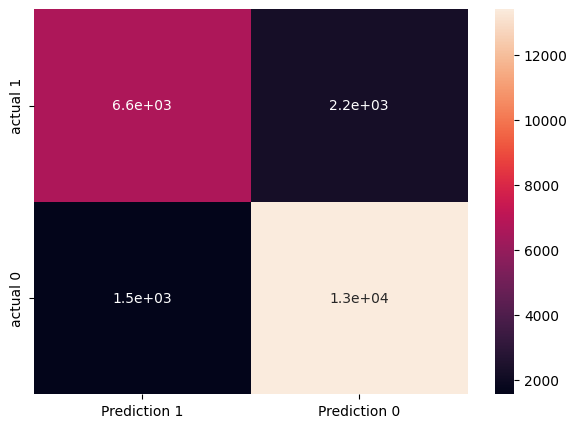

In [126]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_RF_base, annot = True)

## CONCLUSION

I believe there are other prediction analysis that can be carried out with this data, like type of hotel people are likely going to book, prediction of the time of the year people are likely going to book though with time series we can easily infer that. There is still more work that can be done with this data which I intend to continue to do for my personal development.